In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

In [3]:
def cross_val(model, x, y, cv = 5, fit_params = None):
    """
    It prints the mean of cross_val_score

    """
    from sklearn.model_selection import cross_val_score
    print(type(model))
    score = cross_val_score(model, x, y, cv = cv, n_jobs = -1, fit_params = fit_params)
    print(score)
    print("mean of cross val score:")
    print(np.mean(score))
    print()
    print()

In [4]:
training_data = pd.read_csv("/Users/coledixon/Documents/ml-project/training data.csv")
x_train = training_data.iloc[:,1:-1]
y_train = training_data.iloc[:,-1]

gra_clf = Pipeline([
    ("Scaler", StandardScaler()),
    ("gra_clf", GradientBoostingClassifier(n_estimators = 400, learning_rate=1.0, max_depth=1, random_state=0))
])

cross_val(gra_clf, x_train, y_train)

<class 'sklearn.pipeline.Pipeline'>


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

[0.95698925 0.94609164 0.9703504  0.9541779  0.95687332]
mean of cross val score:
0.9568965017534706




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

In [5]:
test_data = pd.read_csv("/Users/coledixon/Documents/ml-project/testing data.csv")
x_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]

gra_clf.fit(x_train,y_train)
y_pred = gra_clf.predict(x_test)

print(np.sum(y_pred == y_test)/len(y_pred))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

0.9723618090452262


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


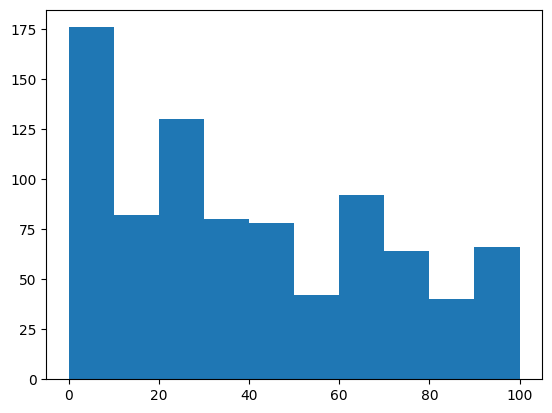

In [25]:
diff = pd.read_csv("KD differences.csv")
plt.hist(diff["kd difference"],range=(0,100))
plt.show()

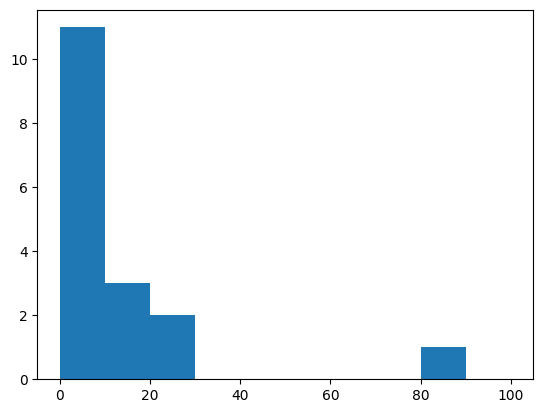

225.60181818181817 35734.58562292609 145901.32308430903


In [28]:
temp = test_data.merge(diff)
false_pred = temp[temp["Output"] != y_pred]
plt.hist(false_pred["kd difference"],range=(0,100))
plt.show()
avg_false_kd_diff = np.mean(false_pred["kd difference"])
avg_kd_diff = np.mean(diff["kd difference"])
std_kd_diff = np.std(diff["kd difference"])
print(avg_false_kd_diff,avg_kd_diff,std_kd_diff)